<a href="https://colab.research.google.com/github/KhanhChinh12/BigData_Group6/blob/main/Amazon_Sales_Big_Data_(N04)_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tổng quan về dữ liệu của Amazon Sales

#### Amazon Sales là bộ dữ liệu về doanh số bán hàng của Amazon, trong đó cung cấp thông tin chi tiết về các giao dịch thương mại điện tử trên nền tảng này ở khoảng thời gian từ 2010 đến 2017.

#### Bộ dữ liệu bao gồm 100 đơn hàng, mỗi đơn hàng lại chứa thông tin về sản phẩm, phản ánh mô hình kinh doanh và hiệu suất bán hàng của Amazon. Để từ đó, có cái nhìn tổng quan và tối ưu hóa lợi nhuận, giảm chi phí, đồng thời nâng cao hiệu suất vận hành.

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Tạo SparkSession
spark = SparkSession.builder \
    .appName("AmazonSalesAnalysis") \
    .getOrCreate()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns

## 1. Khám phá dữ liệu

In [ ]:
# Đọc dữ liệu của Amazon Sales sử dụng Pandas
path_url = 'https://raw.githubusercontent.com/KhanhChinh12/BigData_Group6/main/Amazon%20Sales%20data.csv'
data = pd.read_csv(path_url)

data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,02-04-2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [ ]:
path_url = 'https://raw.githubusercontent.com/KhanhChinh12/BigData_Group6/main/Amazon%20Sales%20data.csv'
df_pandas = pd.read_csv(path_url)

# Chuyển từ Pandas DataFrame sang Spark DataFrame
data = spark.createDataFrame(df_pandas)

data.show()

+--------------------+--------------------+---------------+-------------+--------------+----------+---------+----------+----------+----------+---------+-------------+----------+------------+
|              Region|             Country|      Item Type|Sales Channel|Order Priority|Order Date| Order ID| Ship Date|Units Sold|Unit Price|Unit Cost|Total Revenue|Total Cost|Total Profit|
+--------------------+--------------------+---------------+-------------+--------------+----------+---------+----------+----------+----------+---------+-------------+----------+------------+
|Australia and Oce...|              Tuvalu|      Baby Food|      Offline|             H| 5/28/2010|669165933| 6/27/2010|      9925|    255.28|   159.42|    2533654.0| 1582243.5|    951410.5|
|Central America a...|             Grenada|         Cereal|       Online|             C| 8/22/2012|963881480| 9/15/2012|      2804|     205.7|   117.11|     576782.8| 328376.44|   248406.36|
|              Europe|              Russia|Of

### Nhận xét:

#### Bộ dữ liệu gồm 100 dòng và 14 cột, trong đó mỗi dòng đại diện cho một đơn hàng và có các thông tin sau:

- Thông tin khu vực: Region, Country.
- Loại sản phẩm: Item Type.
- Kênh bán hàng: Sales Channel.
- Mức độ ưu tiên đơn hàng: Order Priority.
- Ngày đặt hàng và giao hàng: Order Date, Ship Date.
- Số lượng sản phẩm bán ra: Units Sold.
- Thông tin đơn hàng: Order ID.
- Giá mỗi đơn vị: Unit Price và chi phí mỗi đơn vị Unit Cost.
- Tổng doanh thu: Total Revenue.
- Tổng chi phí: Total Cost.
- Tổng lợi nhuận: Total Profit.

#### Đơn hàng trải dài trên nhiều khu vực trên toàn thế giới với mức độ đa dạng của sản phẩm khá cao, bao gồm thực phẩm, quần áo, văn phòng phẩm, đồ gia dụng...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Region           100 non-null    object         
 1   Country          100 non-null    object         
 2   Item Type        100 non-null    object         
 3   Sales Channel    100 non-null    object         
 4   Order Priority   100 non-null    object         
 5   Order Date       100 non-null    datetime64[ns] 
 6   Order ID         100 non-null    int64          
 7   Ship Date        100 non-null    datetime64[ns] 
 8   Units Sold       100 non-null    int64          
 9   Unit Price       100 non-null    float64        
 10  Unit Cost        100 non-null    float64        
 11  Total Revenue    100 non-null    float64        
 12  Total Cost       99 non-null     float64        
 13  Total Profit     100 non-null    float64        
 14  Processing Time  100 non-nu

In [ ]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Processing Time'],
      dtype='object')

In [ ]:
data.size

1500

In [ ]:
data.shape

(100, 15)

In [ ]:
data.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,9.900000e+01,1.000000e+02,100
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.252356e+05,4.416820e+05,23 days 08:38:24
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,0 days 00:00:00
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.668760e+05,1.214436e+05,9 days 18:00:00
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.631980e+05,2.907680e+05,23 days 12:00:00
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.621866e+06,6.358288e+05,36 days 06:00:00
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,50 days 00:00:00
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.087451e+06,4.385379e+05,14 days 17:49:19.419899149


In [ ]:
data.isna().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
data.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,datetime64[ns]
Order ID,int64
Ship Date,datetime64[ns]
Units Sold,int64
Unit Price,float64


In [ ]:
data = data.astype({'Ship Date': 'datetime64[ns]', 'Order Date': 'datetime64[ns]'})

data.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,datetime64[ns]
Order ID,int64
Ship Date,datetime64[ns]
Units Sold,int64
Unit Price,float64


## 2. Phân tích và trực quan hóa dữ liệu Amazon Sales

### 2.1 Biểu đồ Heatmap hiển thị giá trị bị thiếu

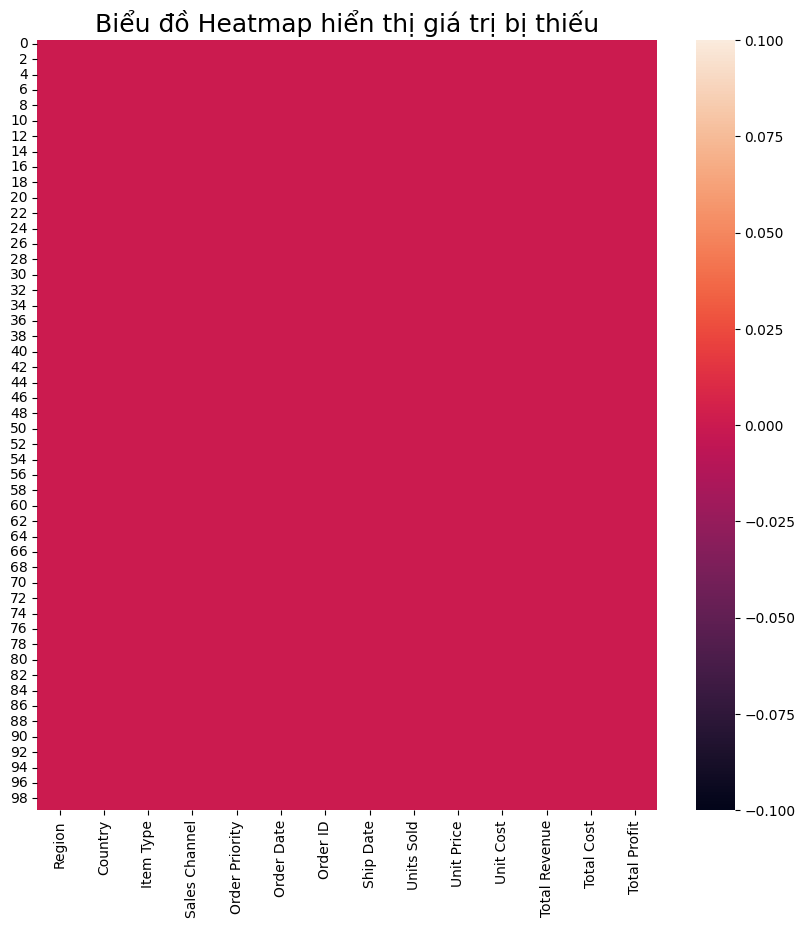

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

plt.title('Biểu đồ Heatmap hiển thị giá trị bị thiếu', fontsize=18)
plt.show()

In [ ]:
test = data.iloc[0, 12] = np.nan
test

nan

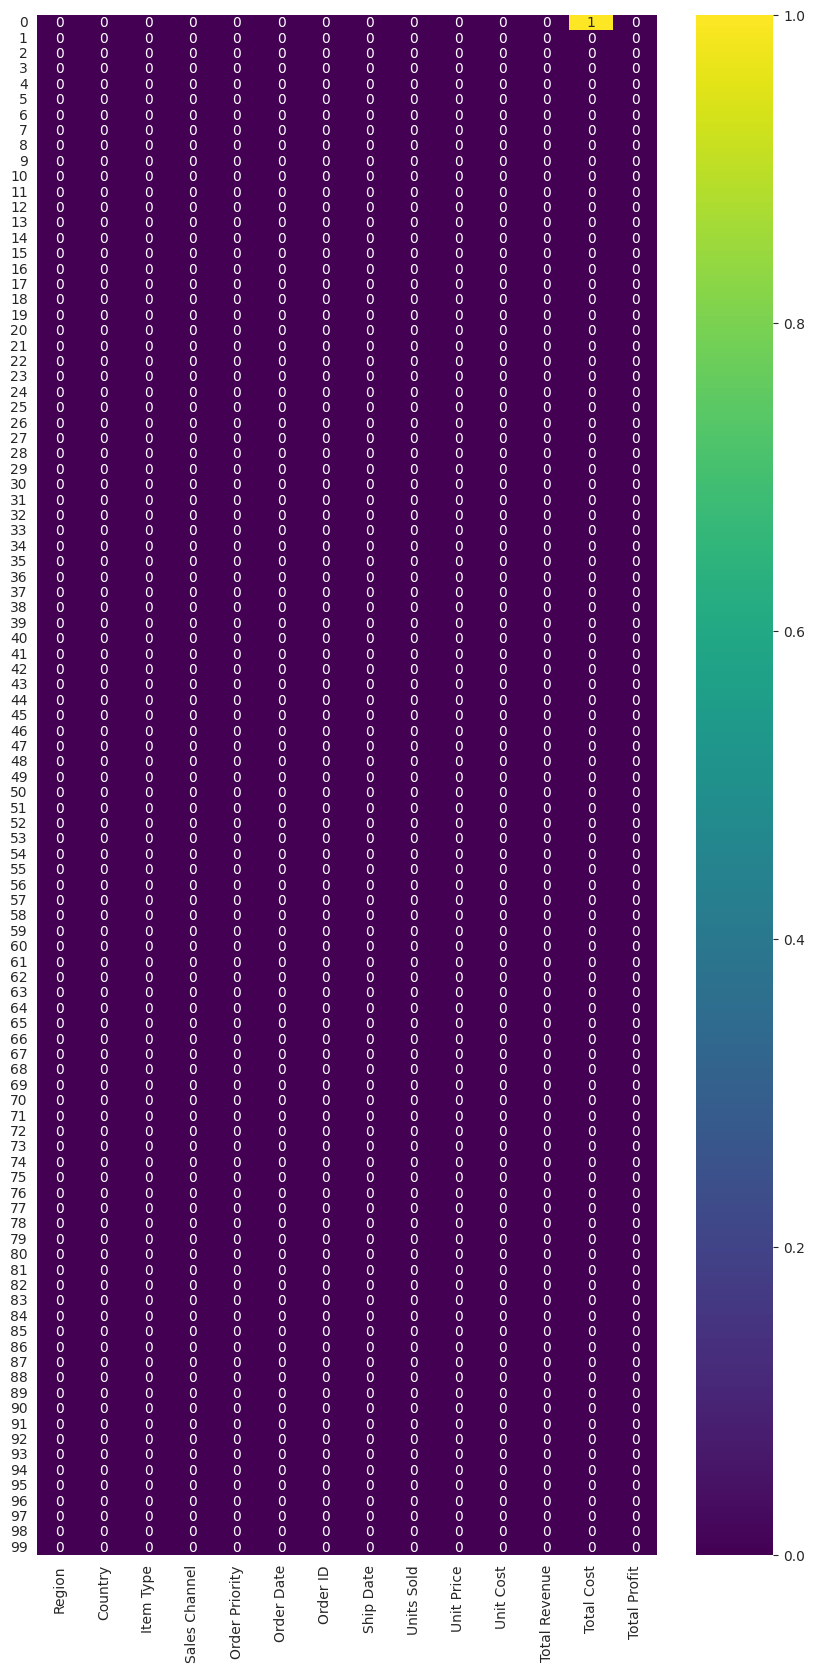

In [ ]:
plt.figure(figsize=(10, 20))
sns.heatmap(data.isnull(), annot = True, cmap='viridis')

plt.show()

In [ ]:
Highest_Total_Revenue = data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()

'Sub-Saharan Africa'

### 2.2 Tổng doanh thu bán hàng cao nhất theo khu vực

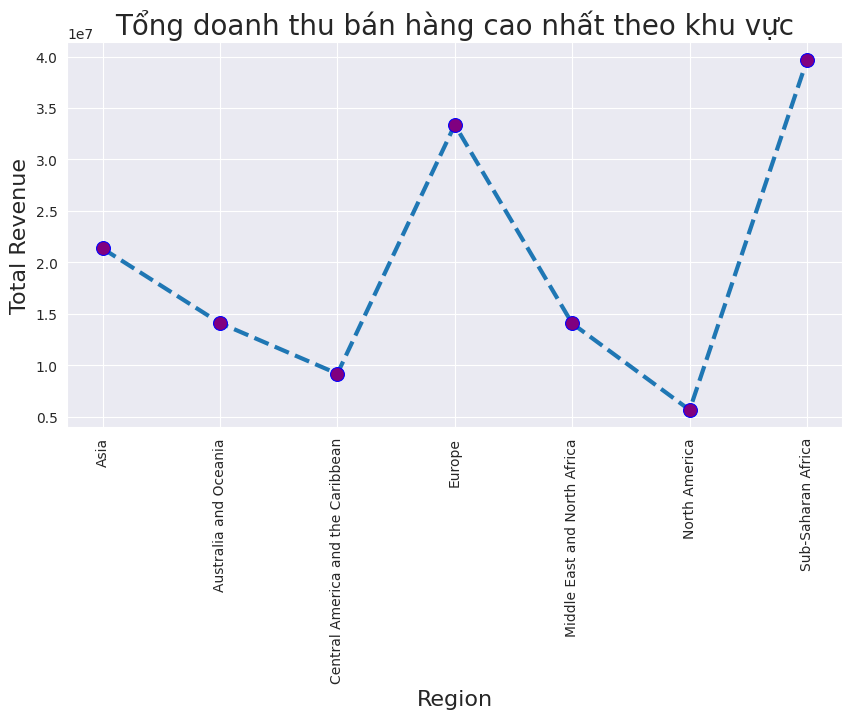

In [ ]:
group_data = data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.lineplot(data = group_data, linestyle = '--', linewidth = 3, marker='o', markersize= 10,
             markerfacecolor='purple', markeredgecolor='blue')

plt.xticks(rotation = 90)
plt.title('Tổng doanh thu bán hàng cao nhất theo khu vực', fontsize=20)
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Total Revenue', fontsize = 16)
plt.show()

In [ ]:
Avg_Unit_Price = data.groupby(data['Item Type'])['Unit Price'].mean()
Avg_Unit_Cost = data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost = pd.DataFrame({'Avg_Unit_Price': Avg_Unit_Price,
                               'Avg_Unit_Cost': Avg_Unit_Cost})
Avg_Price_Cost

,Avg_Unit_Price,Avg_Unit_Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


In [ ]:
Total_Profit_By_Company = data.groupby(data['Country'])['Total Profit'].sum()
Highest_Total_Profit_Country = Total_Profit_By_Company.idxmax()
print("Country with the highest total profit: ", Highest_Total_Profit_Country)

Country with the highest total profit:  Djibouti


### 2.3 Quốc gia có tổng lợi nhuận cao nhất

<ipython-input-10-95ca77bd4799>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_data.index, y=group_data, palette='deep')


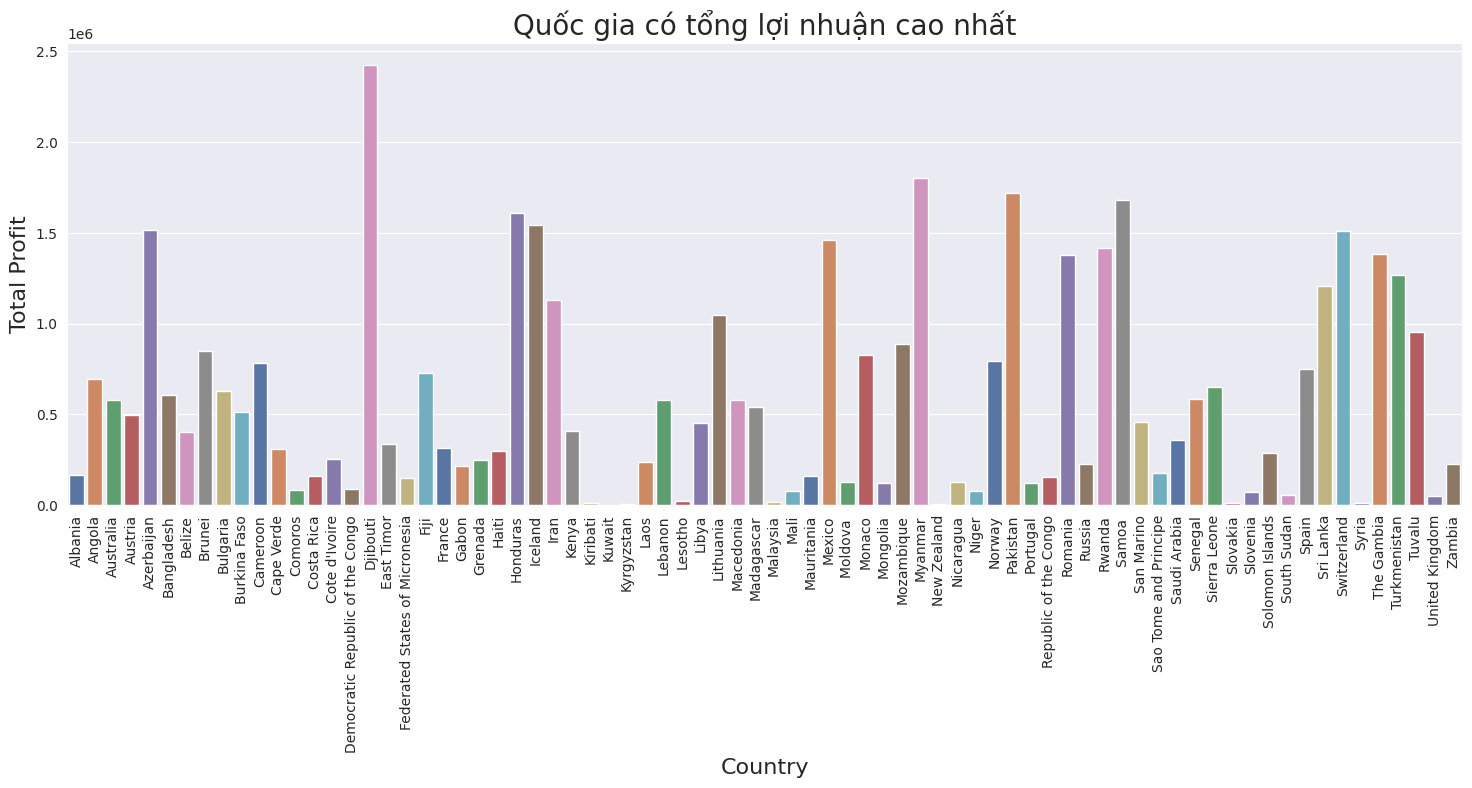

In [ ]:
group_data = data.groupby(data['Country'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(18, 6))
sns.barplot(x=group_data.index, y=group_data, palette='deep')

plt.xticks(rotation = 90)
plt.title('Quốc gia có tổng lợi nhuận cao nhất', fontsize=20)
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Total Profit', fontsize = 16)

plt.show()

In [ ]:
Sales_Channel_Order_Priority_Distribution= data.groupby(data['Sales Channel']) ['Order Priority'].value_counts()
Sales_Channel_Order_Priority_Distribution

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

### 2.4 Phân phối mức độ ưu tiên đơn hàng theo kênh bán hàng

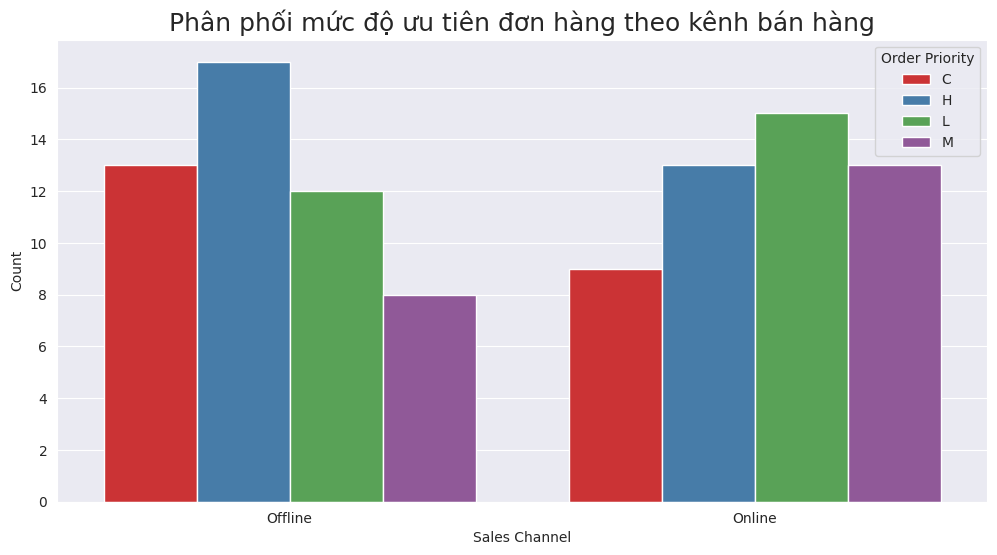

In [ ]:
Sales_Channel_Order_Priority_Distribution = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count()

Sales_Channel_Order_Priority_Distribution = Sales_Channel_Order_Priority_Distribution.reset_index(name='Count')
sns.set_style('darkgrid')

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Channel', y='Count', hue='Order Priority', data=Sales_Channel_Order_Priority_Distribution, palette="Set1")

plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Phân phối mức độ ưu tiên đơn hàng theo kênh bán hàng', fontsize=18)

plt.show()

In [ ]:
data['Processing Time'] = data['Ship Date'] - data['Order Date']

Avg_Processing_Time = data.groupby(data['Sales Channel'])['Processing Time'].mean()
Avg_Processing_Time

,Processing Time
Sales Channel,
Offline,23 days 04:48:00
Online,23 days 12:28:48


### 2.5 Thời gian xử lý trung bình theo kênh bán hàng

<ipython-input-28-5a76a795cec8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=data['Sales Channel'], y=data['Processing Time'].dt.days, width = 0.4, palette="pastel")


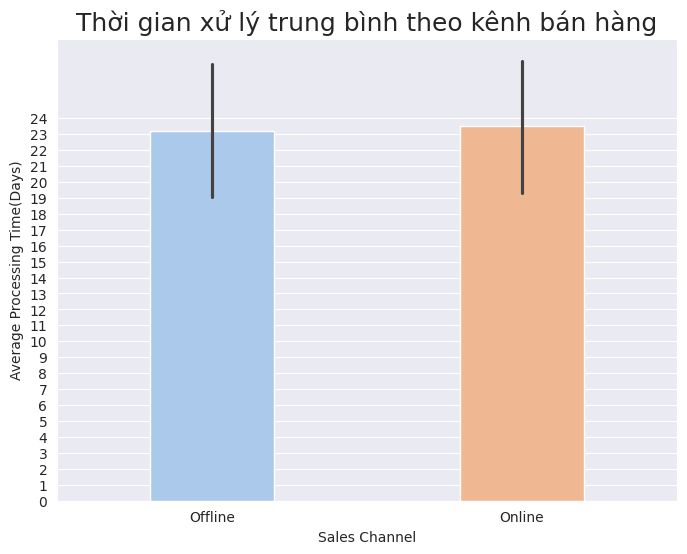

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(data=data, x=data['Sales Channel'], y=data['Processing Time'].dt.days, width = 0.4, palette="pastel")

plt.title('Thời gian xử lý trung bình theo kênh bán hàng', fontsize=18)

plt.xlabel('Sales Channel')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Average Processing Time(Days)')

plt.show()

In [ ]:
group_item_type= data.groupby(data['Item Type'])['Total Revenue'].sum()

highest_sales_revenue_item_type= group_item_type.idxmax()
lowest_sales_revenue_item_type= group_item_type.idxmin()

print("{'Highest Sales Revenue By Item Type':", highest_sales_revenue_item_type,
      "\n'Lowest Sales Revenue By Item Type':", lowest_sales_revenue_item_type, "}")

{'Highest Sales Revenue By Item Type': Cosmetics 
'Lowest Sales Revenue By Item Type': Fruits }


### 2.6 Tổng doanh thu theo loại mặt hàng

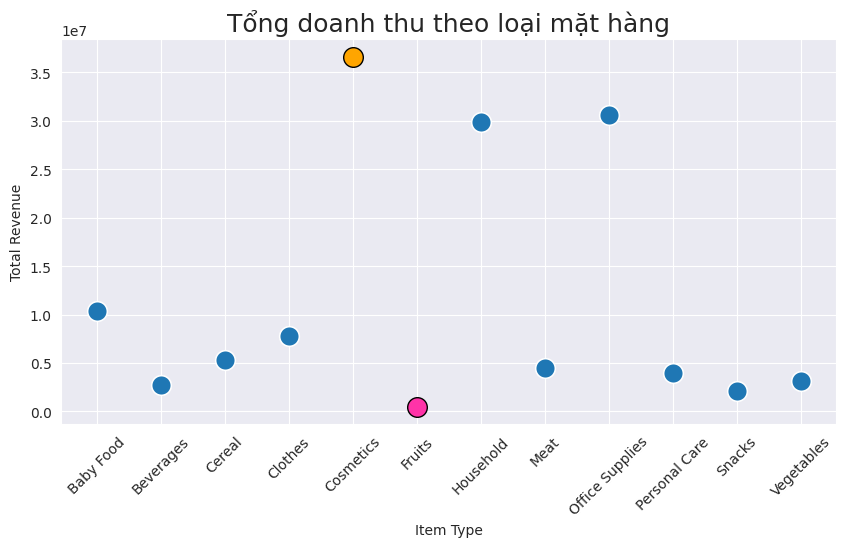

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200)
max_index = group_item_type.idxmax()
plt.scatter(x=max_index, y=group_item_type[max_index], s=200, color='orange', edgecolor='black')

min_index = group_item_type.idxmin()
plt.scatter(x=min_index, y=group_item_type[min_index], s=200, color='#FF33A8', edgecolor='black')

plt.title('Tổng doanh thu theo loại mặt hàng', fontsize=18)

plt.yticks(rotation= 0)
plt.xticks(rotation= 45)
plt.show()

In [ ]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts()
Diff_regions_by_order_priority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   C                  2
                                   M                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  C                  2
                                   H                  2
                                   L                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       L                  4
                                   M                  4
                                   H                  2
North America                      C                  1
                                   L                  1
                                   M                  1
Sub-Saharan Africa                 H                 11
                                   L                  9
                                   C                  8
                                   M                  8
Name: count, dtype: int64

### 2.7 Số lượng đơn hàng theo mức độ ưu tiên trong từng khu vực

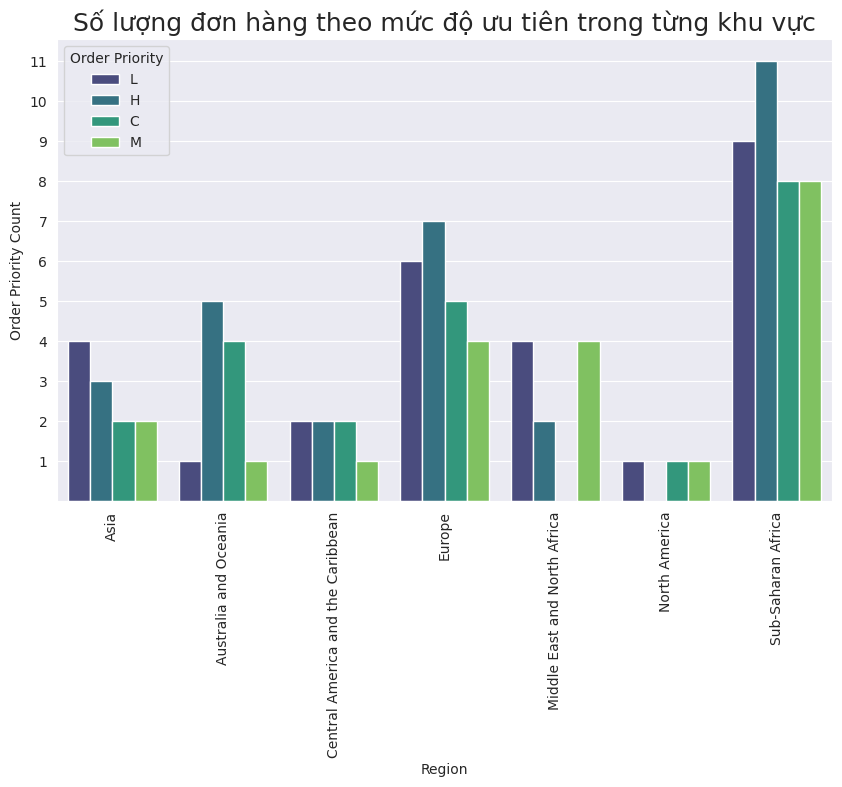

In [ ]:
plt.figure(figsize= (10,6))

Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts().reset_index(name='Order Priority Count')
sns.barplot(data= Diff_regions_by_order_priority, x= 'Region', y= 'Order Priority Count', hue= 'Order Priority', palette='viridis')

plt.title('Số lượng đơn hàng theo mức độ ưu tiên trong từng khu vực', fontsize=18)

plt.xticks(rotation= 90)
plt.yticks(np.arange(1,12,1))

plt.show()

In [ ]:
Correlation_Unit_Price_Total_Profit= data['Unit Price'].corr(data['Total Profit'])

print("Correlation between Unit Price and Total Profit:", Correlation_Unit_Price_Total_Profit)

Correlation between Unit Price and Total Profit: 0.5573652488121267


### 2.8 Tương quan giữa giá đơn vị và tổng lợi nhuận

<function matplotlib.pyplot.show(close=None, block=None)>

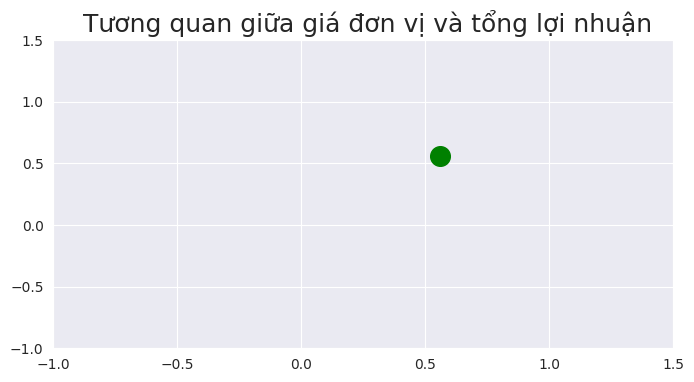

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(x=Correlation_Unit_Price_Total_Profit, y=Correlation_Unit_Price_Total_Profit, s=200, color='green' )

plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))

plt.title(' Tương quan giữa giá đơn vị và tổng lợi nhuận', fontsize=18)

plt.show

In [ ]:
month_names= {1: 'JAN',
              2: 'FEB',
              3: 'MAR',
              4: 'APR',
              5: 'MAY',
              6: 'JUN',
              7: 'JUL',
              8: 'AUG',
              9: 'SEPT',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = data.groupby(data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales

,Total Revenue
Order Date,
JAN,10482467.12
FEB,24740517.77
MAR,2274823.87
APR,16187186.33
MAY,13215739.99
JUN,5230325.77
JUL,15669518.50
AUG,1128164.91
SEPT,5314762.56


### 2.9 Tổng doanh thu theo từng tháng

<ipython-input-39-62d96eb698f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= monthly_sales.index, y= monthly_sales, palette='coolwarm')


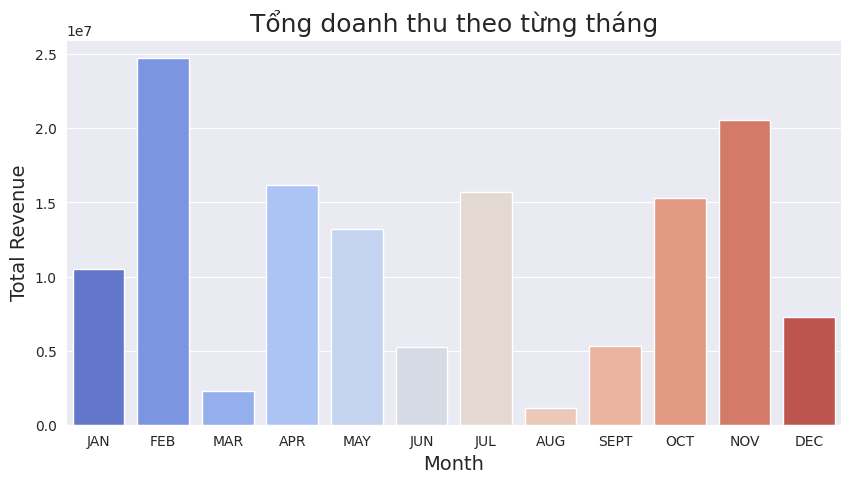

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(x= monthly_sales.index, y= monthly_sales, palette='coolwarm')

plt.title('Tổng doanh thu theo từng tháng', fontsize= 18)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

plt.show()

In [ ]:
Diff_countries_by_unit_sold= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')
pd.set_option('display.max_rows',None)

Diff_countries_by_unit_sold

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


### 2.10 Tổng số đơn vị sản phẩm được bán ra theo từng quốc gia

<ipython-input-41-43af5030ce9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Diff_countries_by_unit_sold, x='Country', y='Unit Sold', palette=palette)


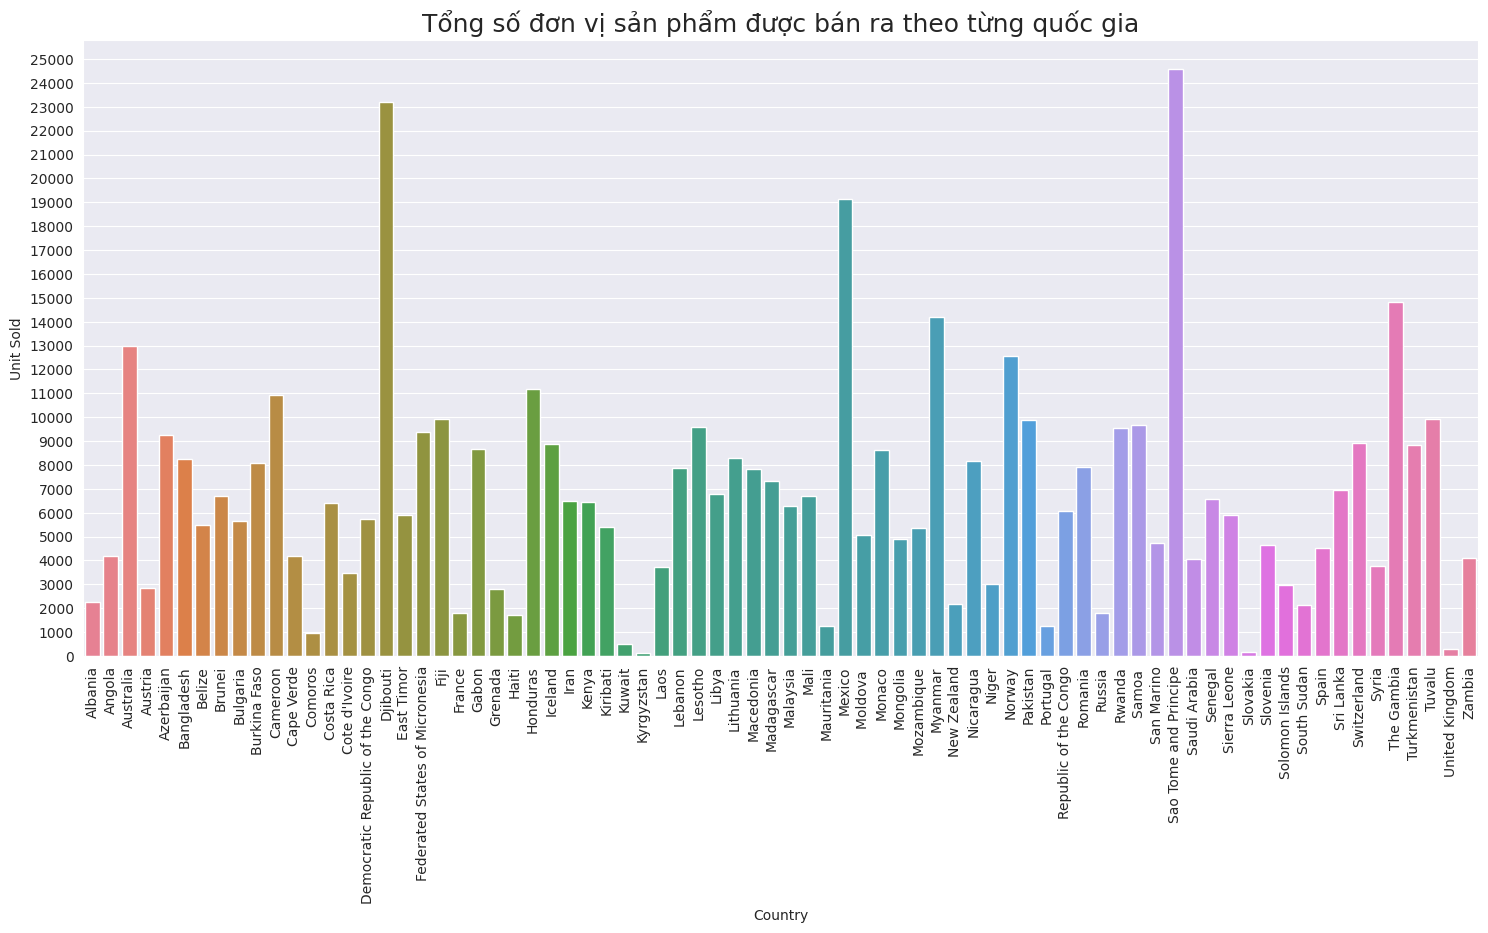

In [ ]:
plt.figure(figsize= (18, 8))

num_colors = len(Diff_countries_by_unit_sold['Country'].unique())
palette = sns.color_palette("husl", num_colors)

sns.barplot(data=Diff_countries_by_unit_sold, x='Country', y='Unit Sold', palette=palette)

plt.title('Tổng số đơn vị sản phẩm được bán ra theo từng quốc gia', fontsize=18)

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 26000, 1000))

plt.show()

In [ ]:
sales_revenue_by_countries=  data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')
sales_revenue_by_countries

,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


### 2.11 Tổng doanh thu của từng quốc gia

<ipython-input-45-a12f380721b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_revenue_by_countries['Country'], y=sales_revenue_by_countries['Total Revenue'], palette=palette)


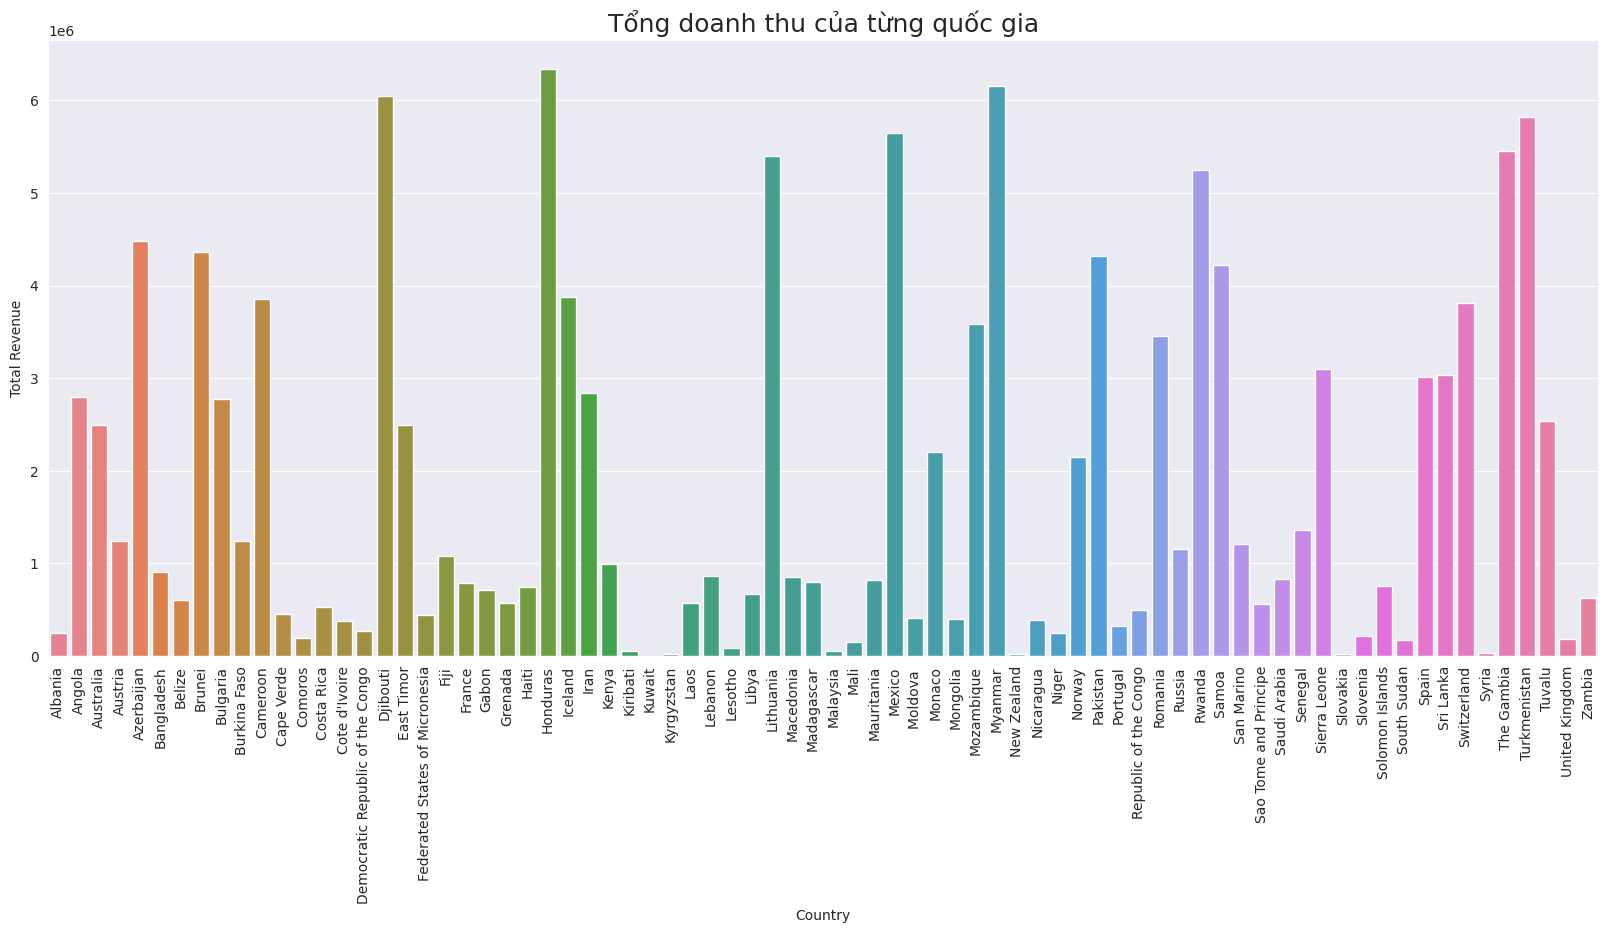

In [ ]:
plt.figure(figsize=(20, 8))

num_colors_1 = len(Diff_countries_by_unit_sold['Country'].unique())
palette = sns.color_palette("husl", num_colors_1)

sns.barplot(x=sales_revenue_by_countries['Country'], y=sales_revenue_by_countries['Total Revenue'], palette=palette)

plt.title('Tổng doanh thu của từng quốc gia', fontsize=18)

plt.xticks(rotation=90)
plt.show()

In [ ]:
unit_price_and_item_type_distribution= data.groupby(data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
unit_price_and_item_type_distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


### 2.12 Tỷ lệ danh mục sản phẩm

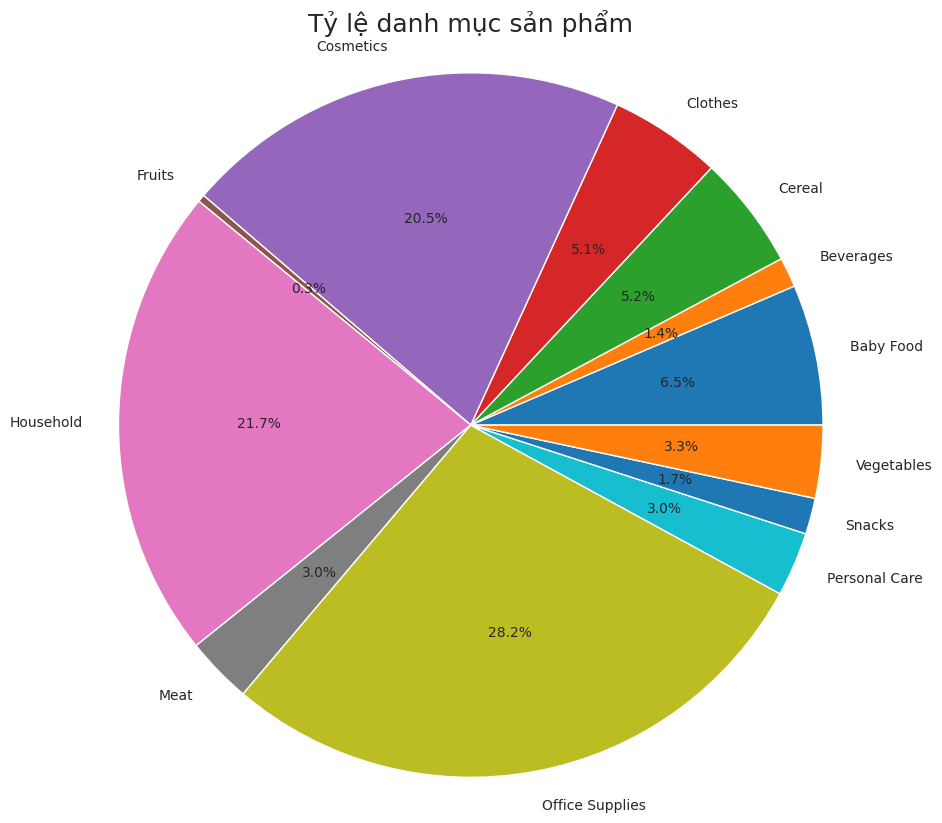

In [ ]:
plt.figure(figsize=(10, 10))

plt.pie(x=unit_price_and_item_type_distribution['Unit Price'], labels=unit_price_and_item_type_distribution['Item Type'],
        autopct='%1.1f%%')

plt.title('Tỷ lệ danh mục sản phẩm', fontsize=18)
plt.axis('equal')
plt.show()

### 2.13 Phân bố giá đơn vị theo loại sản phẩm

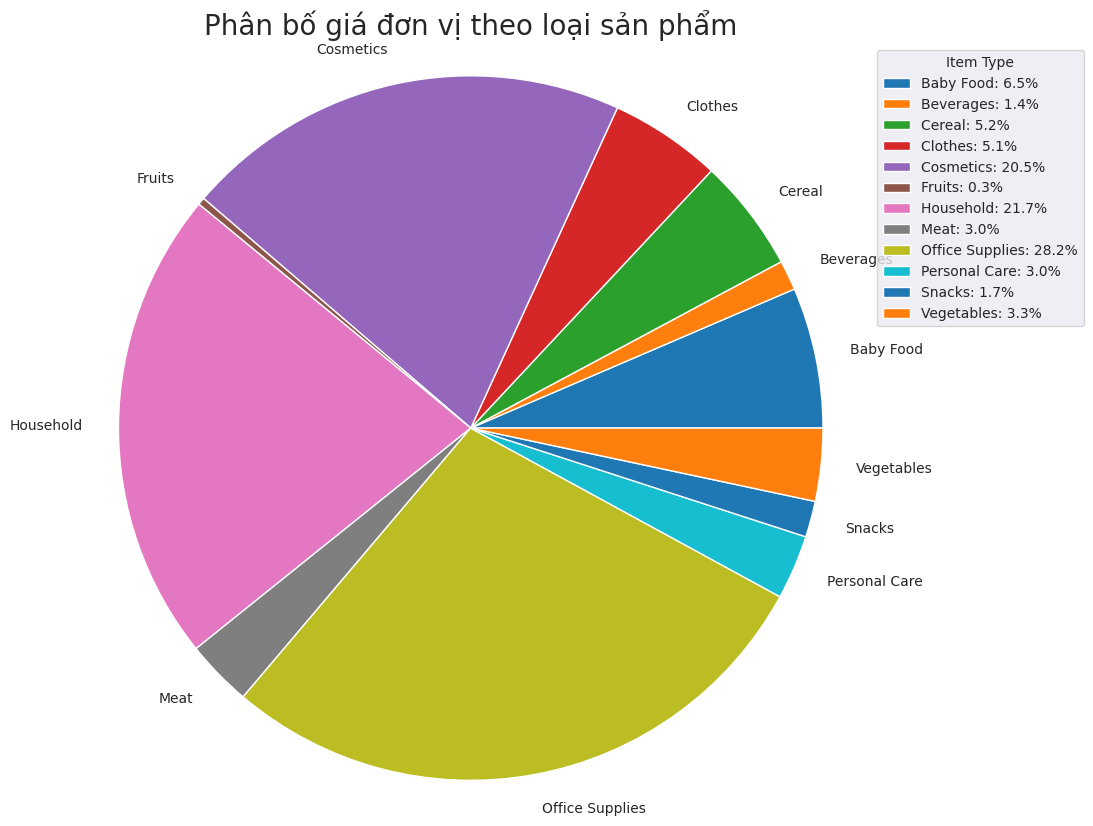

In [ ]:
plt.figure(figsize=(10, 10))

wedges, texts = plt.pie(
    x=unit_price_and_item_type_distribution['Unit Price'],
    labels=unit_price_and_item_type_distribution['Item Type'],
    wedgeprops={'edgecolor': 'white'}
)

percentages = unit_price_and_item_type_distribution['Unit Price'] / unit_price_and_item_type_distribution['Unit Price'].sum() * 100
legend_labels = [f"{item}: {percent:.1f}%" for item, percent in zip(unit_price_and_item_type_distribution['Item Type'], percentages)]

plt.legend(wedges, legend_labels, title="Item Type", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.axis('equal')
plt.title("Phân bố giá đơn vị theo loại sản phẩm", fontsize=20)

plt.show()

In [ ]:
Highest_avg_unit_price_for_sales_channel= data.groupby(data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'new')
Highest_avg_unit_price_for_sales_channel

,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


### 2.14 Kênh bán hàng có giá đơn vị trung bình cao nhất

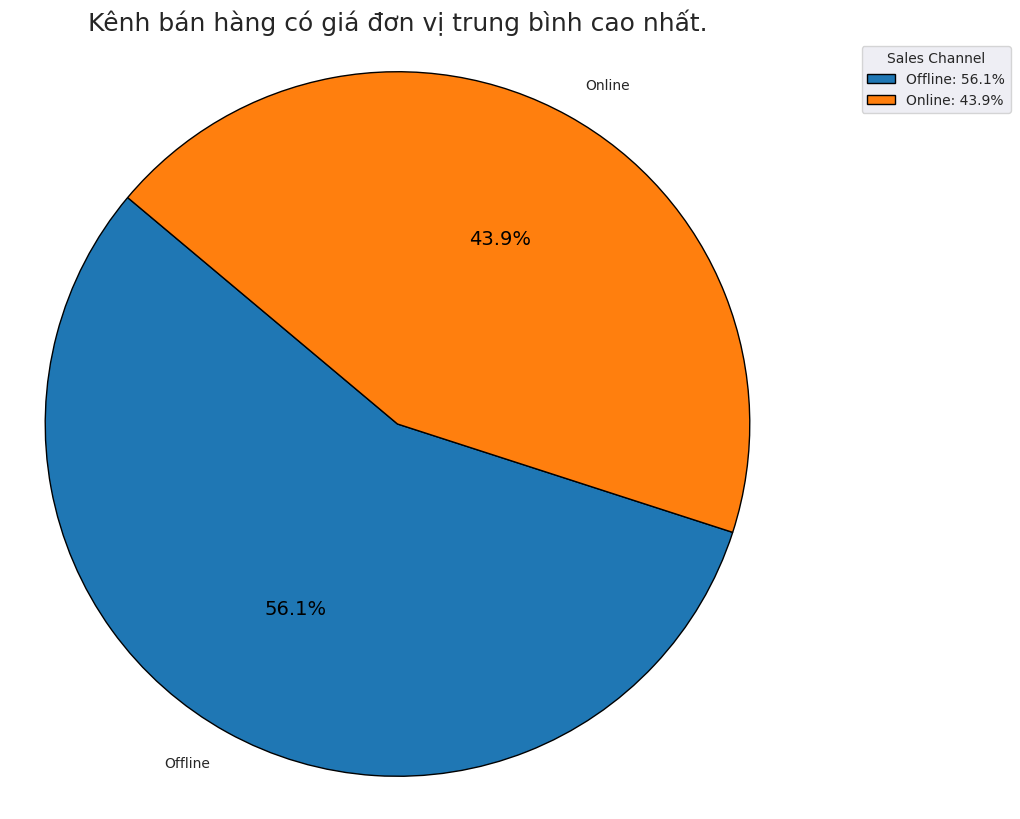

In [ ]:
plt.figure(figsize=(10, 10))

wedges, texts, autotexts = plt.pie(
    x=Highest_avg_unit_price_for_sales_channel['new'],
    labels=Highest_avg_unit_price_for_sales_channel['Sales Channel'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color("black")

percentages = (Highest_avg_unit_price_for_sales_channel['new'] /
               Highest_avg_unit_price_for_sales_channel['new'].sum()) * 100

legend_labels = [f"{item}: {percent:.1f}%" for item, percent in zip(Highest_avg_unit_price_for_sales_channel['Sales Channel'], percentages)]

plt.legend(wedges, legend_labels, title="Sales Channel", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.axis('equal')
plt.title("Kênh bán hàng có giá đơn vị trung bình cao nhất.", fontsize=18)

plt.show()

In [ ]:
q1 = data['Total Cost'].quantile(0.25)
q3 = data['Total Cost'].quantile(0.75)

iqr = q3-q1

lower_fence = q1-1.5*iqr
upper_fence = q3+1.5*iqr

outliers = data[(data['Total Cost']<lower_fence)| (data['Total Cost']>upper_fence)].reset_index(drop= True)
outliers

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,5 days
1,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,44 days
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days


### 2.15 Biểu đồ hộp thể hiện phân phối tổng chi phí

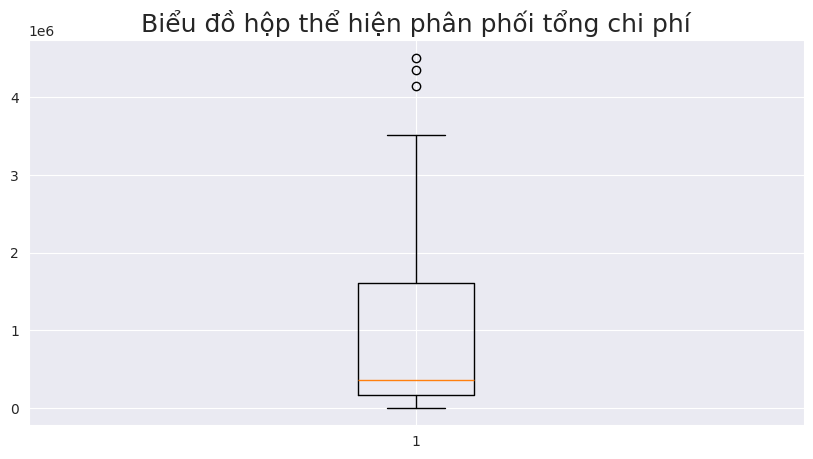

In [ ]:
plt.figure(figsize=(10, 5))

plt.boxplot(data['Total Cost'])
plt.title('Biểu đồ hộp thể hiện phân phối tổng chi phí', fontsize=18)

plt.show()

In [ ]:
total_profit_and_diff_item_types=data.groupby(data['Item Type'])['Total Profit'].sum().reset_index(name='Total Profit')
total_profit_and_diff_item_types

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


In [ ]:
data['avg total revenue']= data['Total Revenue']/data['Units Sold']

highest_avg_total_revenue_per_order= data.groupby(data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)

highest_avg_total_revenue_per_order.head(1)

,avg total revenue
Region,
Asia,335.809091


In [ ]:
Correlation_unit_sold_and_total_profit= data['Units Sold'].corr(data['Total Profit'])
print(f"Correlation coefficient: {Correlation_unit_sold_and_total_profit}")

Correlation coefficient: 0.5645504620845976


In [ ]:
Order_priority_vary_on_item_type= data.groupby(data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')
Order_priority_vary_on_item_type

,Order Priority,Item Type,No. Of Items
0,C,Beverages,7
1,C,Clothes,4
2,C,Office Supplies,2
3,C,Personal Care,2
4,C,Vegetables,2
5,C,Baby Food,1
6,C,Cereal,1
7,C,Cosmetics,1
8,C,Fruits,1
9,C,Household,1


## 3. Kết luận

#### Dữ liệu Amazon Sales cung cấp tổng quan về hoạt động bán hàng của Amazon, bao gồm 100 đơn hàng với 14 thuộc tính khác nhau. Mỗi đơn hàng chứa thông tin chi tiết về khu vực địa lý (Region, Country), loại sản phẩm (Item Type), kênh bán hàng (Sales Channel), mức độ ưu tiên (Order Priority) và các thông tin liên quan đến thời gian đặt hàng và vận chuyển (Order Date, Ship Date). Ngoài ra, dữ liệu còn chứa các thông tin về số lượng sản phẩm (Units Sold), giá và chi phí đơn vị (Unit Price, Unit Cost), cũng như tổng doanh thu, chi phí và lợi nhuận (Total Revenue, Total Cost, Total Profit). Phản ánh một mạng lưới bán hàng đa dạng trên toàn cầu, với nhiều loại sản phẩm khác nhau, từ thực phẩm, quần áo đến văn phòng phẩm và đồ gia dụng.

#### Phân tích doanh thu cho thấy khu vực Bắc Mỹ (North America) có tổng doanh thu cao nhất, cho thấy đây là thị trường quan trọng đối với Amazon. Về lợi nhuận, quốc gia Lithuania đạt được tổng lợi nhuận cao nhất, có sự khác biệt trong hiệu quả kinh doanh giữa các khu vực. Xét theo thời gian, doanh thu của Amazon đạt đỉnh vào tháng 7 và thấp nhất vào tháng 1. Có thể liên quan đến các yếu tố về mùa hoặc các chương trình khuyến mãi đặc biệt trong năm.

#### Trong số các loại sản phẩm, "Office Supplies" là mặt hàng mang lại tổng doanh thu cao nhất cho Amazon, trong khi "Personal Care" lại có doanh thu thấp nhất. Điều này có thể giúp Amazon tập trung vào các sản phẩm có tiềm năng tăng trưởng cao hơn.

#### Về kênh bán hàng, kênh trực tuyến (Online) có số lượng đơn hàng được ưu tiên cao hơn so với kênh ngoại tuyến (Offline), cho thấy tầm quan trọng của kênh trực tuyến trong chiến lược bán hàng của Amazon. Bên cạnh đó, thời gian xử lý đơn hàng trung bình giữa hai kênh bán hàng không có sự khác biệt đáng kể.

#### Phân tích mối tương quan giữa các biến số cho thấy có sự tương quan dương giữa giá đơn vị sản phẩm (Unit Price) và tổng lợi nhuận (Total Profit), nghĩa là khi giá sản phẩm tăng lên, lợi nhuận cũng có xu hướng tăng. Tương tự, số lượng sản phẩm bán ra (Units Sold) cũng có mối tương quan dương với tổng lợi nhuận, cho thấy tầm quan trọng của việc bán được nhiều sản phẩm để tăng lợi nhuận.

#### Một vài outliers đã được phát hiện trong cột "Total Cost", cho thấy có một vài giao dịch với chi phí bất thường và cần được xem xét kỹ hơn. Khu vực Châu Âu (Europe) có số lượng đơn hàng được ưu tiên mức "High" nhiều nhất so với các khu vực khác. Về số lượng sản phẩm bán ra, "Cosmetics" là mặt hàng bán chạy nhất, trong khi "Baby Food" có số lượng bán ra thấp nhất. Giá trung bình của sản phẩm bán qua kênh offline có xu hướng cao hơn so với kênh online.

#### Nhìn chung, dữ liệu Amazon Sales cung cấp chi tiết về hoạt động kinh doanh của công ty, với những thông tin hữu ích về doanh thu, lợi nhuận, các sản phẩm và kênh bán hàng. Cho thấy sự đa dạng trong hoạt động bán hàng của Amazon trên các khu vực và loại sản phẩm khác nhau. Từ đó, Amazon có thể đưa ra những quyết định kinh doanh hiệu quả hơn, tập trung vào những thị trường và sản phẩm có tiềm năng tăng trưởng cao, đồng thời tối ưu hóa các kênh bán hàng. Theo dõi và phân tích dữ liệu là cần thiết để Amazon có thể nắm bắt được các xu hướng thị trường và duy trì lợi thế cạnh tranh.